<a href="https://colab.research.google.com/github/Keqing1109/api/blob/main/RSM8413/KaggleCarsDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("used_cars_data.csv")

In [ ]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [ ]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [ ]:
(df.isnull().sum()/(len(data)))*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

Some columns or variables can be dropped if they do not add value to our analysis.

In our dataset, the column S.No have only ID values, assuming they don’t have any predictive power to predict the dependent variable.

In [ ]:
# Remove S.No. column from data
df = df.drop(['S.No.'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [ ]:
from datetime import date
date.today().year
df['Car_Age']=date.today().year-df['Year']
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,12


In [ ]:
df['Brand'] = data.Name.str.split().str.get(0)

In [ ]:
df['Model'] = data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)

In [ ]:
df[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


In [ ]:
print(data.Brand.unique())
print(data.Brand.nunique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']
33


In [ ]:
searchfor = ['Isuzu' ,'ISUZU','Mini','Land']
data[data.Brand.str.contains('|'.join(searchfor))].head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
13,13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,27.00,11,Land,RoverRange
14,14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.50,13,Land,RoverFreelander
176,176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6 kmpl,1998 CC,112 bhp,5.0,NaN,23.00,8,Mini,CountrymanCooper
191,191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,55.76,7,Land,RoverRange
228,228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82 kmpl,1998 CC,189.08 bhp,4.0,44.28 Lakh,35.67,8,Mini,CooperConvertible


In [ ]:
data.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price,Car_Age
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000,7253.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468,11.634634
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917,3.254421
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000,6.000000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000,9.000000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000,11.000000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000,14.000000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000,29.000000


From the statistics summary, we can infer the below findings :

Years range from 1996- 2019 and has a high in a range which shows used cars contain both latest models and old model cars.
On average of Kilometers-driven in Used cars are ~58k KM. The range shows a huge difference between min and max as max values show 650000 KM shows the evidence of an outlier. This record can be removed.
Min value of Mileage shows 0 cars won’t be sold with 0 mileage. This sounds like a data entry issue.
It looks like Engine and Power have outliers, and the data is right-skewed.
The average number of seats in a car is 5. car seat is an important feature in price contribution.
The max price of a used car is 160k which is quite weird, such a high price for used cars. There may be an outlier or data entry issue.

In [ ]:
data.describe(include='all')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
count,7253.000000,7253,7253,7253.000000,7.253000e+03,7253,7253,7253,7251,7207,7207,7200.000000,1006,6019.000000,7253.000000,7253,7252
unique,NaN,2041,11,NaN,NaN,5,2,4,450,150,386,NaN,625,NaN,NaN,33,726
top,NaN,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,NaN,95.13 Lakh,NaN,NaN,Maruti,SwiftDzire
freq,NaN,55,949,NaN,NaN,3852,5204,5952,207,732,280,NaN,6,NaN,NaN,1444,189
mean,3626.000000,NaN,NaN,2013.365366,5.869906e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.279722,NaN,9.479468,11.634634,NaN,NaN
std,2093.905084,NaN,NaN,3.254421,8.442772e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.811660,NaN,11.187917,3.254421,NaN,NaN
min,0.000000,NaN,NaN,1996.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000,6.000000,NaN,NaN
25%,1813.000000,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000,9.000000,NaN,NaN
50%,3626.000000,NaN,NaN,2014.000000,5.341600e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000,11.000000,NaN,NaN
75%,5439.000000,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000,14.000000,NaN,NaN


In [ ]:
df.iloc[0:,7:12]= df.iloc[0:,7:12].replace(to_replace=r'[^0-9]+', value='', regex=True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,266,998,5816,5.0,NaN,1.75,15,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1967,1582,1262,5.0,NaN,12.50,10,Hyundai,Creta1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,182,1199,887,5.0,861,4.50,14,Honda,JazzV
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,2077,1248,8876,7.0,NaN,6.00,13,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,152,1968,1408,5.0,NaN,17.74,12,Audi,A4New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,2054,1598,1036,5.0,NaN,NaN,14,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,1721,1197,1036,5.0,NaN,NaN,10,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,2308,1461,631,5.0,NaN,NaN,13,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,172,1197,1036,5.0,NaN,NaN,12,Volkswagen,PoloGT


In [ ]:
df['Kilometers_Driven'] = df['Kilometers_Driven'].astype('int64')
df.describe(include='all')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
count,7253,7253,7253.000000,7.253000e+03,7253,7253,7253,7251,7207,7207,7200.000000,1006,6019.000000,7253.000000,7253,7252
unique,2041,11,NaN,NaN,5,2,4,438,150,385,NaN,617,NaN,NaN,33,726
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,170,1197,74,NaN,504,NaN,NaN,Maruti,SwiftDzire
freq,55,949,NaN,NaN,3852,5204,5952,208,732,280,NaN,6,NaN,NaN,1444,189
mean,NaN,NaN,2013.365366,5.869906e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.279722,NaN,9.479468,11.634634,NaN,NaN
std,NaN,NaN,3.254421,8.442772e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.811660,NaN,11.187917,3.254421,NaN,NaN
min,NaN,NaN,1996.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000,6.000000,NaN,NaN
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000,9.000000,NaN,NaN
50%,NaN,NaN,2014.000000,5.341600e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000,11.000000,NaN,NaN
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000,14.000000,NaN,NaN


In [ ]:
#df = df.dropna()    # Dropping the missing values.
#df.count()

In [ ]:
cat_col=df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price', 'Brand', 'Model'],
      dtype='object')
Numerical Variables:
['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Car_Age']


Year
Skew : -0.84


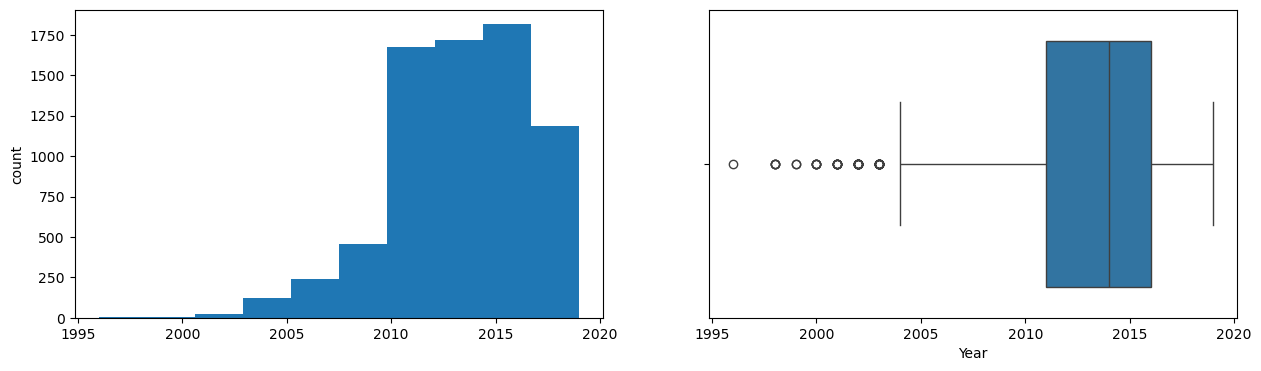

Kilometers_Driven
Skew : 61.58


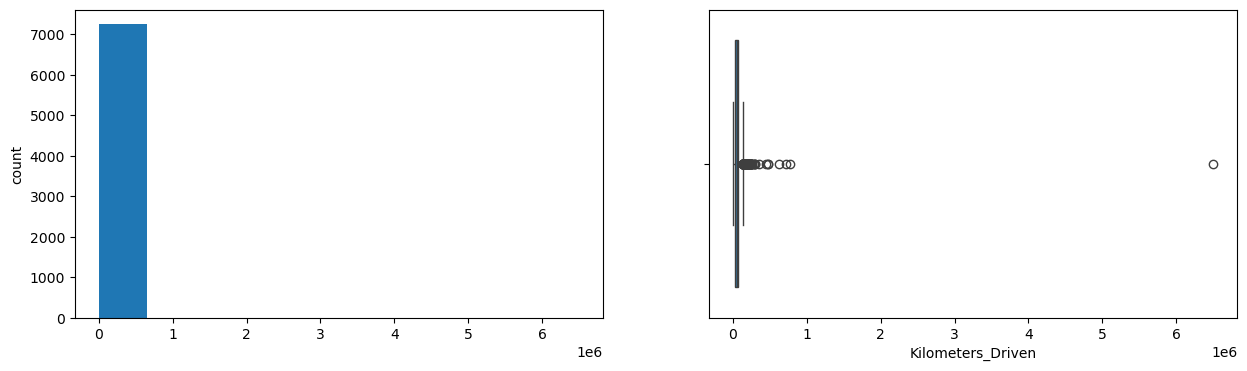

Seats
Skew : 1.9


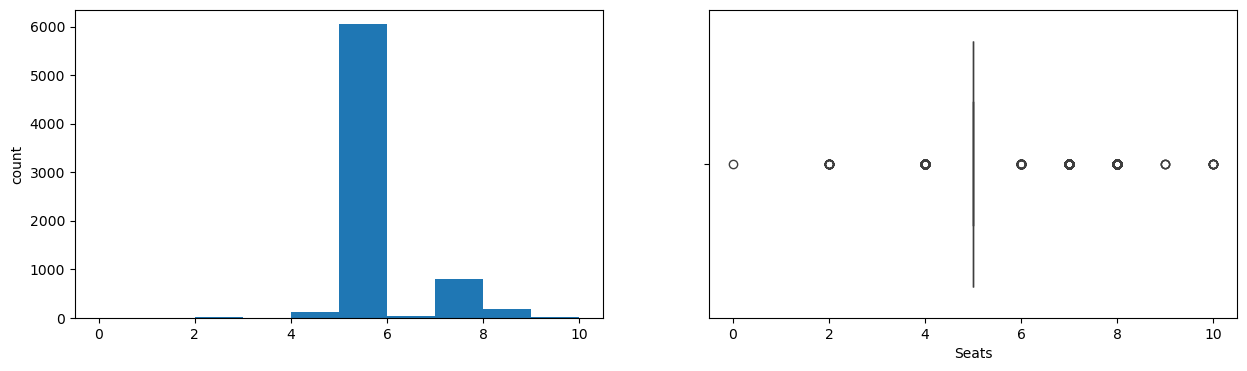

Price
Skew : 3.34


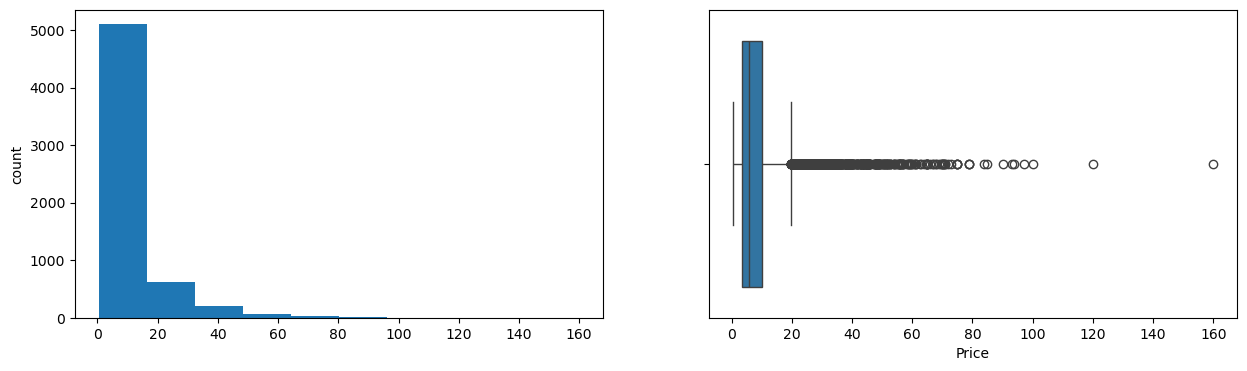

Car_Age
Skew : 0.84


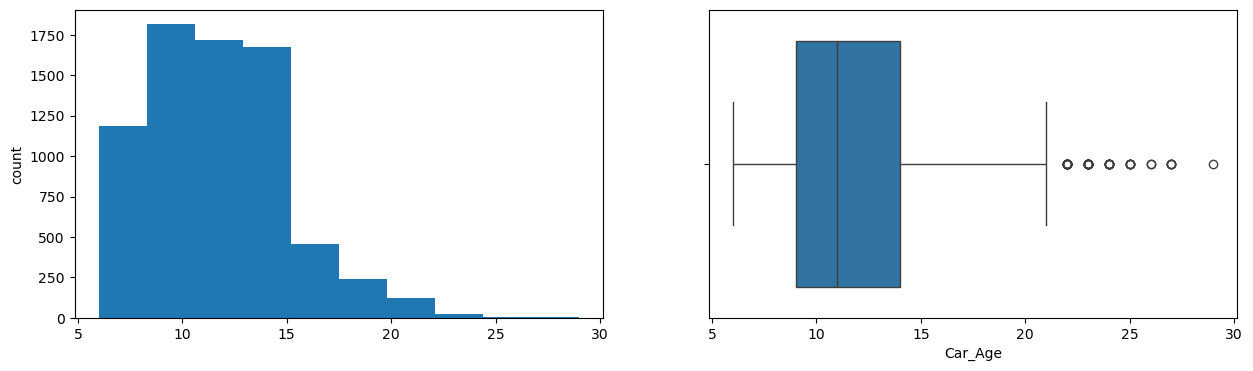

In [ ]:
for col in num_col:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

In [ ]:
Q1 = df[num_col].quantile(0.25)
Q3 = df[num_col].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                     5.00
Kilometers_Driven    39000.00
Seats                    0.00
Price                    6.45
Car_Age                  5.00
dtype: float64


In [ ]:
idex = ~((df[num_col] < (Q1 - 1.5* IQR)) |(df[num_col] > (Q3 + 1.5* IQR))).any(axis=1)

df = df.loc[idex]
df[num_col].shape

(5392, 5)

Year
Skew : -0.84


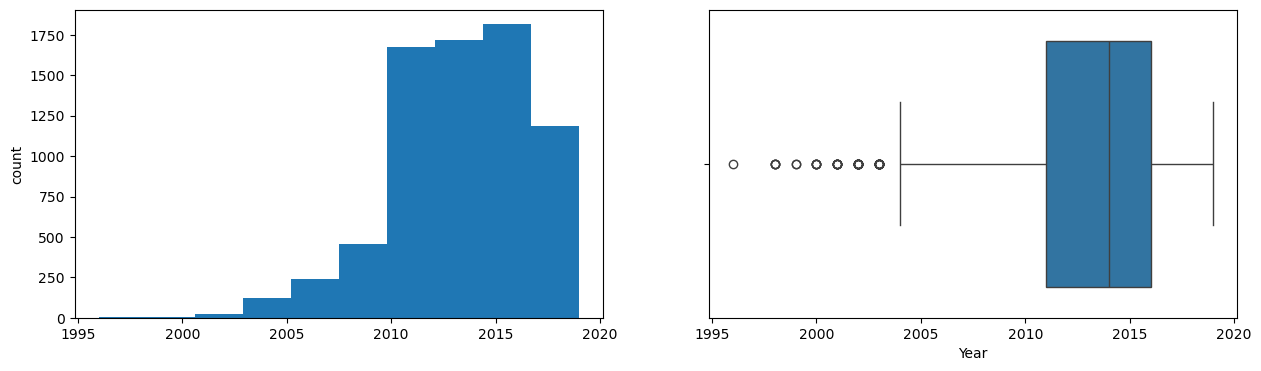

Kilometers_Driven
Skew : 61.58


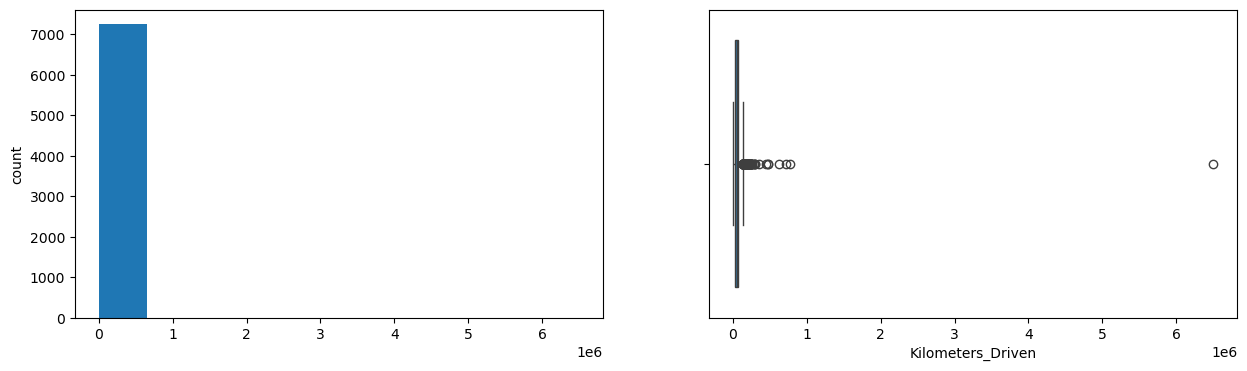

Seats
Skew : 1.9


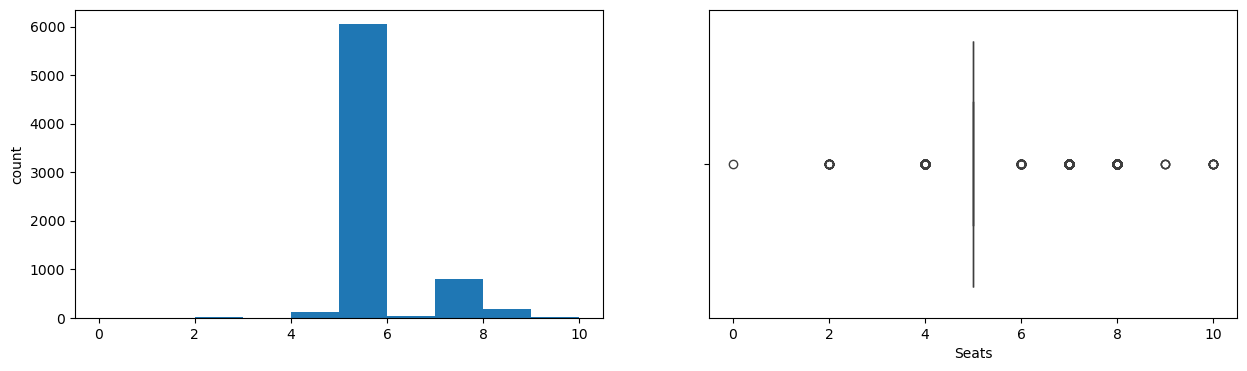

Price
Skew : 3.34


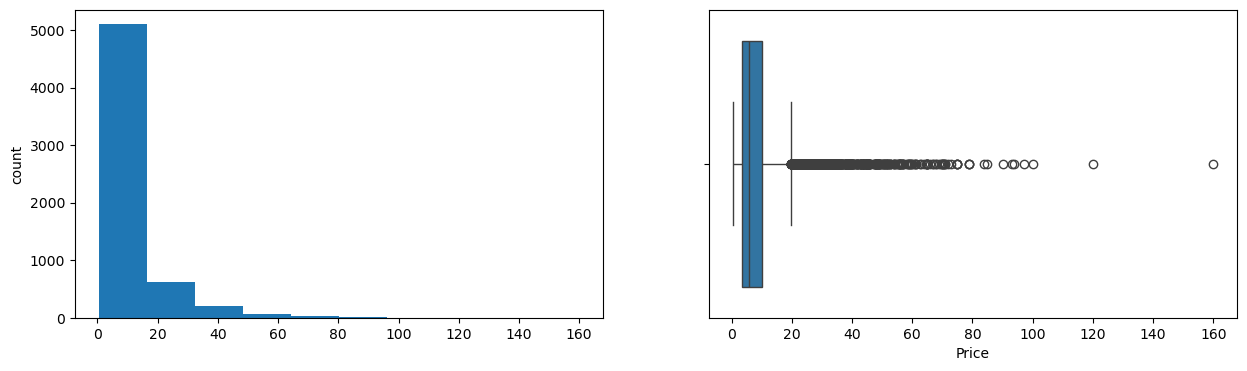

Car_Age
Skew : 0.84


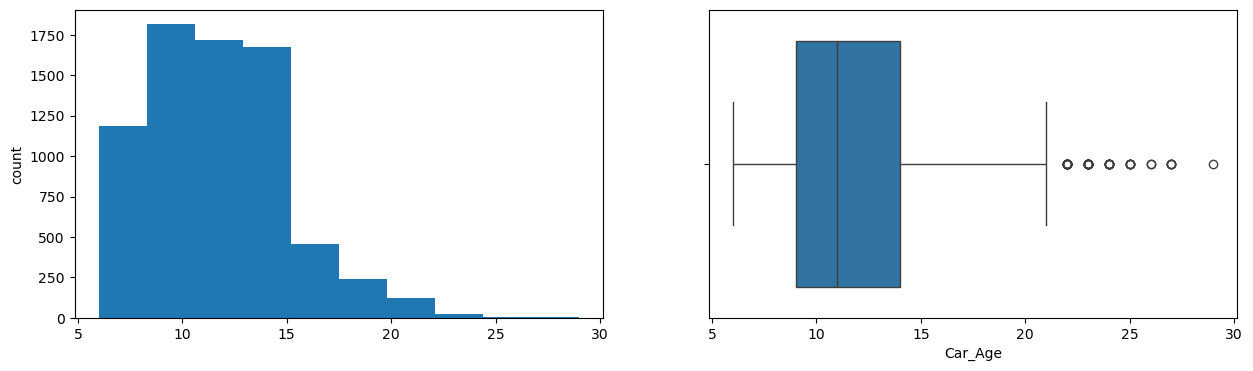

In [ ]:
for col in num_col:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

In [ ]:
num_col

['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Car_Age']

In [ ]:
idex

0        True
1        True
2        True
3       False
4        True
        ...  
7248     True
7249     True
7250     True
7251     True
7252     True
Length: 7253, dtype: bool

In [ ]:
df[num_col].describe()

,Year,Kilometers_Driven,Seats,Price,Car_Age
count,5392.000000,5392.000000,5346.0,4390.000000,5392.000000
mean,2013.330675,53188.561758,5.0,5.738727,11.669325
std,3.094907,26263.114325,0.0,3.705989,3.094907
min,2004.000000,171.000000,5.0,0.450000,6.000000
25%,2011.000000,33499.000000,5.0,3.200000,9.000000
50%,2014.000000,52000.000000,5.0,4.750000,11.000000
75%,2016.000000,70000.000000,5.0,6.990000,14.000000
max,2019.000000,131000.000000,5.0,19.500000,21.000000


In [ ]:
df[num_col].dtypes

Year                   int64
Kilometers_Driven      int64
Seats                float64
Price                float64
Car_Age                int64
dtype: object

<Axes: xlabel='Kilometers_Driven'>

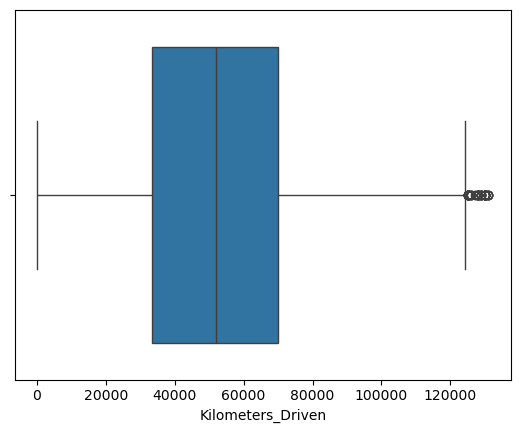

In [ ]:
sns.boxplot(x=df['Kilometers_Driven'])

Price and Kilometers Driven are right skewed for this data to be transformed, and all outliers will be handled during imputation

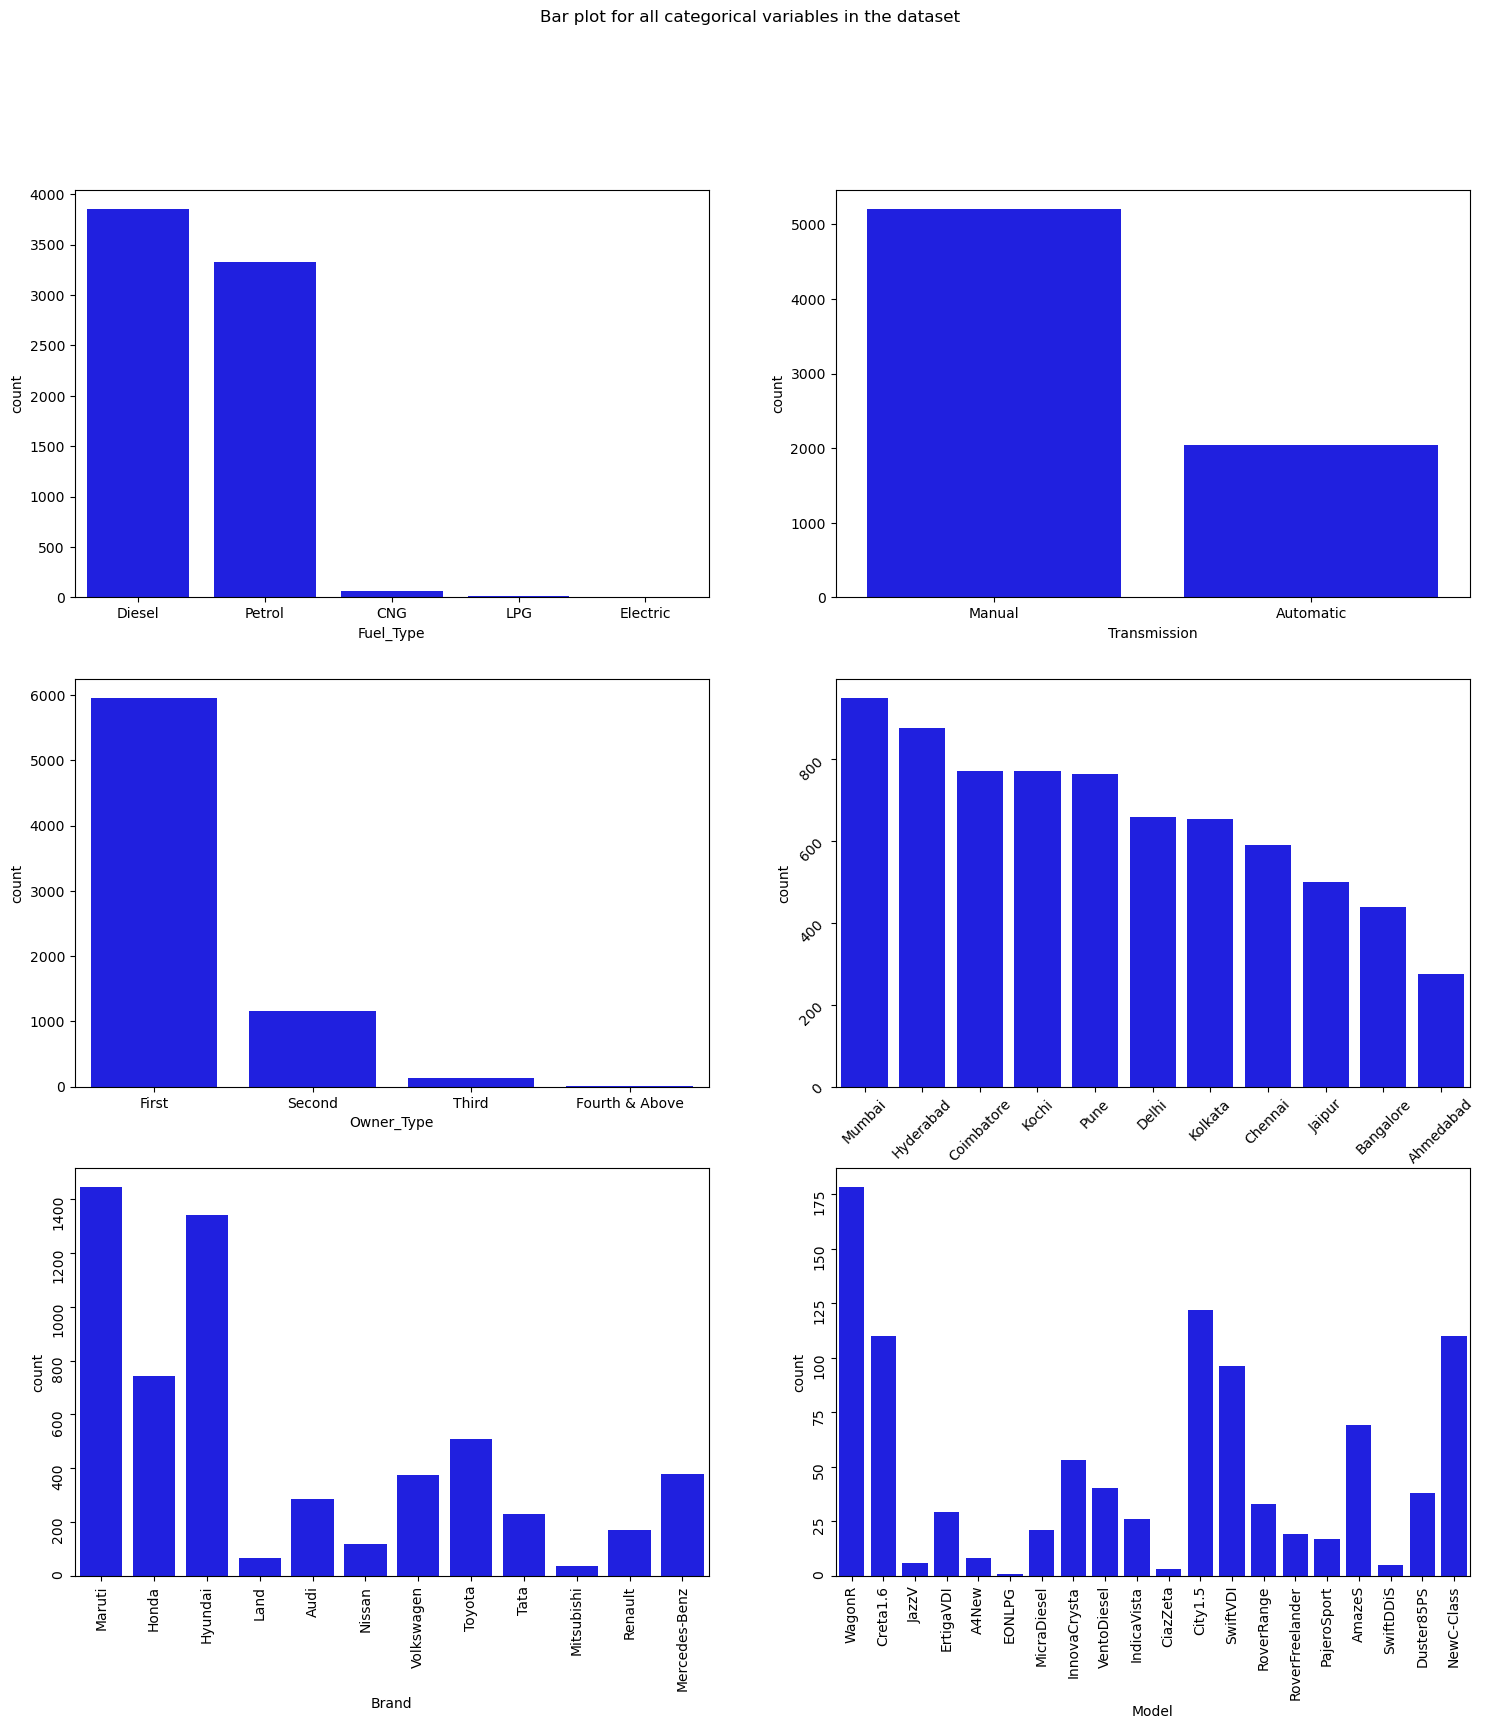

In [ ]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Fuel_Type', data = data, color = 'blue',
              order = data['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Transmission', data = data, color = 'blue',
              order = data['Transmission'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Owner_Type', data = data, color = 'blue',
              order = data['Owner_Type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Location', data = data, color = 'blue',
              order = data['Location'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Brand', data = data, color = 'blue',
              order = data['Brand'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Model', data = data, color = 'blue',
              order = data['Model'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

Mumbai has the highest number of cars available for purchase, followed by Hyderabad and Coimbatore
~53% of cars have fuel type as Diesel this shows diesel cars provide higher performance
~72% of cars have manual transmission
~82 % of cars are First owned cars. This shows most of the buyers prefer to purchase first-owner cars
~20% of cars belong to the brand Maruti followed by 19% of cars belonging to Hyundai
WagonR ranks first among all models which are available for purchase

[]

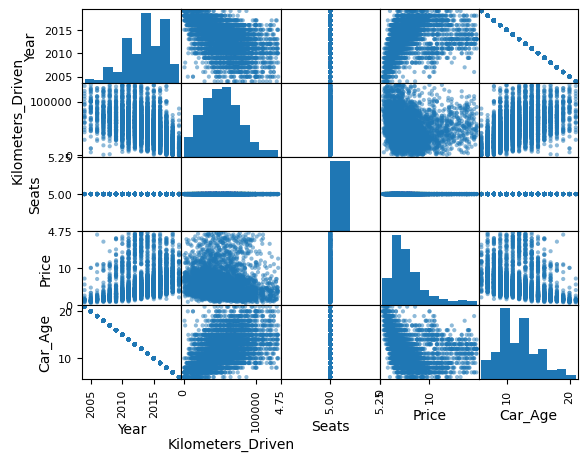

In [ ]:
from pandas.plotting import sc1atter_matrix
scatter_matrix(df)
plt.plot(figsize=(14,18),kind='box', subplots=True, layout=(4,4),sharex=False, sharey = False)

plt.figure(figsize=(40,40))
sns.pairplot(data=df)
plt.show()

array([[<Axes: xlabel='Year', ylabel='Year'>,
        <Axes: xlabel='Kilometers_Driven', ylabel='Year'>,
        <Axes: xlabel='Seats', ylabel='Year'>,
        <Axes: xlabel='Price', ylabel='Year'>,
        <Axes: xlabel='Car_Age', ylabel='Year'>],
       [<Axes: xlabel='Year', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Kilometers_Driven', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Seats', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Price', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Car_Age', ylabel='Kilometers_Driven'>],
       [<Axes: xlabel='Year', ylabel='Seats'>,
        <Axes: xlabel='Kilometers_Driven', ylabel='Seats'>,
        <Axes: xlabel='Seats', ylabel='Seats'>,
        <Axes: xlabel='Price', ylabel='Seats'>,
        <Axes: xlabel='Car_Age', ylabel='Seats'>],
       [<Axes: xlabel='Year', ylabel='Price'>,
        <Axes: xlabel='Kilometers_Driven', ylabel='Price'>,
        <Axes: xlabel='Seats', ylabel='Price'>,
        <Axes: xlabel='Price

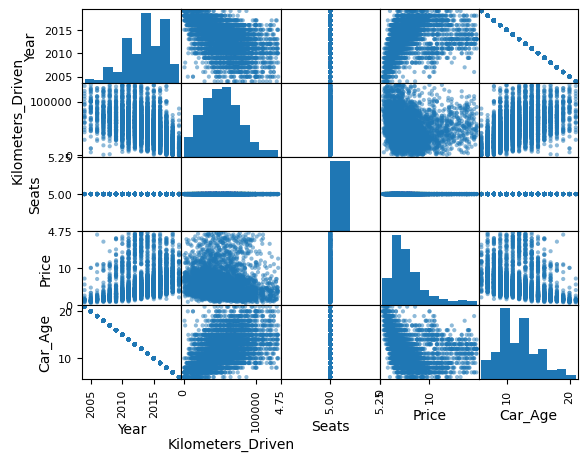

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)

Pair Plot provides below insights:

The variable Year has a positive correlation with price and mileage
A year has a Negative correlation with kilometers-Driven
Mileage is negatively correlated with Power
As power increases, mileage decreases
Car with recent make is higher at prices. As the age of the car increases price decreases
Engine and Power increase, and the price of the car increases
A bar plot can be used to show the relationship between Categorical variables and continuous variables

In [ ]:
colume_name = ["Year", "Kilometers_Driven","Seats","Price","Car_Age"]
df1 = df[colume_name]

In [ ]:
df.dtypes

In [ ]:
df1.drop('Seats', axis=1, inplace=True)

In [ ]:
df1

In [ ]:
sns.heatmap(df1.corr(method='pearson'), annot = True, vmin=-1, vmax=1, ax=None)

In [ ]:
df1

In [ ]:
df1.dtypes

From the Heat map, we can infer the following:
The engine has a strong positive correlation to Power 0.86
Price has a positive correlation to Engine 0.69 as well Power 0.77
Mileage has correlated to Engine, Power, and Price negatively
Price is moderately positive in correlation to year.
Kilometer driven has a negative correlation to year not much impact on the price
Car age has a negative correlation with Price
Car age positively correlates with kilometers driven, as the age of the car increases, the kilometers driven also increase. In contrast, car age negatively correlates with mileage, which makes sense.

In [ ]:
df.isnull().sum()

In [ ]:
df.dtypes

In [ ]:
df

In [ ]:
df["Mileage"] = df["Mileage"].astype(float)
#df[["Engine","Power"]] = df[["Engine","Power"]].astype(float)

In [ ]:
columename = ["Mileage","Price"]
df["Mileage"].fillna(value = np.mean(df["Mileage"]), inplace=True)
#data['Mileage'].fillna(value=np.mean(data['Mileage']),inplace=True)

In [ ]:
df

### df = df.drop("New_Price", axis=1)

In [ ]:
df

In [ ]:
# Dropping the missing values.

In [ ]:
sns.heatmap(df1.corr(method='pearson'), annot = True, vmin=-1, vmax=1, ax=None)

In [ ]:
#df = df.dropna()    # Dropping the missing values.
#df.count()